# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [18]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')


## Task 1

Run the code below before you start working on your homework:


In [19]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [20]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [21]:
task2_data = pd.read_csv('../data/hw3-task2-data.csv')
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [71]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:1], task2_data.iloc[:,2], test_size = 0.25, train_size = 0.75)

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [81]:
model = KMeans(n_clusters = 2).fit(Xtrain, Ytrain)
predictions =  model.predict(Xtest)

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [98]:
from sklearn.metrics import accuracy_score
cm = confusion_matrix(Ytest, predictions)
accuracy = accuracy_score(Ytest, predictions)
accuracy

0.5336134453781513

As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

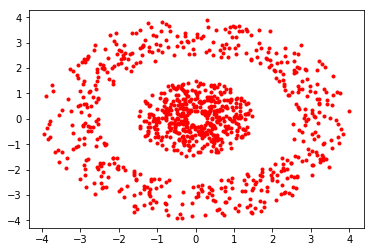

In [135]:
import matplotlib.pyplot as plt
plt.plot(task2_data.x, task2_data.y, '.', color = 'r' )

In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

K-means algorithm will never work here because it is an unsupervised algorithm. It is hard to distinguish clusters without knowing the expected outift. As we see from the plot the points are scattered uniformly like circles. The algorithm may not be able  to process that one cluster should surround the other one.

## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [137]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean').fit(Xtrain, Ytrain)
predictions =  model.predict(Xtest)

Now, construct the confusion matrix, and calculate your accuracy.

In [138]:
cm = confusion_matrix(Ytest, predictions)
accuracy = accuracy_score(Ytest, predictions)
accuracy

0.8109243697478992

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

K-nn is a supervised model and worked better because by detecting the closest points it gets a better idea to select the correct clusters.

## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [143]:
data = pd.read_excel('../data/BreastTissue.xlsx')
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [155]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.iloc[:,0], data.iloc[:,3], test_size = 0.25, train_size = 0.75)

In [156]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
model.fit(Xtrain, Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest, predicted)
accuracy = accuracy_score(Ytest, predicted)
print(cm)
print(accuracy)

ValueError: could not convert string to float: 'con'

Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [ ]:
scaler = StandardScaler()
scaler.fit(??)
xs = ?? # your code goes here

Now, repeat mdoel construction, training, testing and accuracy calculation

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = ???
model = ??
model.fit(??)
predicted = ??
cm = ??
accuracy = ??????
print(cm)
print(accuracy)

Why did we get better results? Explain below:

### Your explanation goes below

HERE

## Task 5

Now, construct a k-nn model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [ ]:
## Your code goes here